<a href="https://colab.research.google.com/github/yebiny/Lecture_deeplearning_basic/blob/main/1_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형 회귀 (Linear Regression)
>**목차**
1. 개념정리
2. 손실함수: 평균제곱오차 (Mean Squared Error)
3. 최적화: 경사하강법 (Gradient Descent) 
4. 실습1: 단순선형회귀분석(Simple Linear Regression Analysis)
5. 실습2: 다중선형회귀분석(Multiple Linear Regression Analysis)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

## 1. 개념정리
---

</br>

###<center> < 가설 > </center>
###  <center>$f(x_i)=wx_i+b$</center>

</br>

### <center> < 목적 > </center>
### <center>$(w^{*}, b^{*})=arg \; min \sum_{i=1}^m(y_i-\hat{y}_i)^2$</center>
### <center>$=arg \; min \sum_{i=1}^m(y_i-f(x_i) )^2$</center>
### <center>$=arg \; min \sum_{i=1}^m(y_i-wx_i-b)^2$</center>

### **구현**


In [3]:
def hypothesis(x, w=1, b=0):
  return w*x+b

### **예제**

|공부시간|종합점수|
|------|---|
|1|1.1|
|2|1.2|
|3|2.2|
|4|3.1|
|5|3.7|

* 데이터 정의

In [4]:
x = np.array([1,2,3,4,5])
y = np.array([1.1, 1.2, 2.2, 3.1, 3.7])

* 예측

In [5]:
y_pred = hypothesis(x, w=1)
print(y_pred)

[1 2 3 4 5]


* 시각화

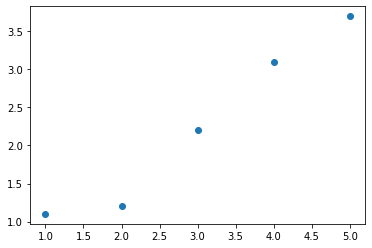

In [6]:
plt.plot(x, y, marker = 'o', linestyle = '')

## 2. 손실함수: 평균제곱오차 (Mean Squred Error)
---

</br>

### <center>$ MSE = \sum_{i=1}^m(y_i-\hat{y}_i)^2$</center>

### <center>$=\sum_{i=1}^m(y_i-wx_i-b)^2$

### **구현**

In [7]:
def MSE(y , y_pred):
  i = 0
  for yi, yi_pred in zip(y, y_pred):
    i += (yi-yi_pred)**2
  return i

* 계산

In [8]:
error = MSE(y, y_pred)
print(error)

3.789999999999999


### **Error 시각화**

*  W 값에 따른 Error 값 변화

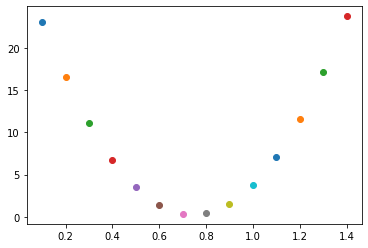

In [9]:
w_array = np.arange(0.1, 1.5, 0.1)

for w in w_array:
  y_pred = hypothesis(x, w)
  error = MSE(y, y_pred)
  plt.plot(w, error, marker = 'o')

plt.show() 

## 3. 최적화: 경사하강법 ( Gradient Desent )
---
</br>

## <center>$w^* =  w-\alpha\frac{\theta }{\theta w}Cost(w) $</center>


<center> 기울기가 음수일 때: $\frac{\theta }{\theta w}Cost(w) < 0 \rightarrow w* = w+\alpha*(기울기)$</center>
<center>기울기가 음수이면 $w$는 지금보다 큰 값으로 업데이트</center>

</br>

<center> 기울기가 양수일 때: $\frac{\theta }{\theta w}Cost(w) > 0 \rightarrow w* = w-\alpha*(기울기)$</center>
<center>기울기가 양수이면 $w$는 지금보다 작은 값으로 업데이트</center>


### **구현**

In [10]:
# y_pred = f(x) = ax + b

def diff(xi, yi, w):
  return 2*(xi**2)*w-2*xi*yi

def GD(xi, yi, w, alpha=0.01):
  return w-(alpha*diff(xi, yi, w))

### **학습**

In [11]:
xi = x[0]
yi = y[0]

w_new = 1
print(w_new)
for xi, yi, in zip(x, y):
  w_new = GD(xi, yi, w_new)
  print(w_new)

1
1.002
0.96984
0.9272688
0.878542784
0.809271392


### **파라미터**: $\alpha$ 값에 따른 W 변화

In [12]:
w_new = 1
print(w_new)
for xi, yi, in zip(x, y):
  w_new = GD(xi, yi, w_new, alpha=0.01)
  print(w_new)

1
1.002
0.96984
0.9272688
0.878542784
0.809271392


## 4. 실습1: 단순 선형 회귀 분석(Simple Linear Regression Analysis)
---

<br>

###  <center>$f(x_i)=wx_i+b$</center>



### **데이터**

|공부시간|종합점수|
|------|---|
|0|0|
|1|11|
|2|23|
|3|30|
|4|44|
|5|55|
|6|61|
|7|73|
|8|84|
|9|98|



* 데이터 정의

In [13]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([0, 11, 23, 30, 44, 55, 61, 73, 84, 98])

x.shape, y.shape

((10,), (10,))

* 시각화

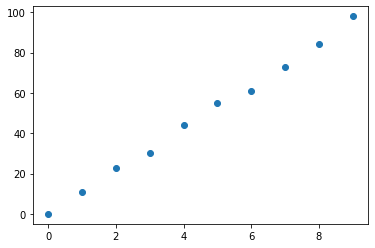

In [14]:
plt.plot(x, y, linestyle = '', marker = 'o')
plt.show()

### **모델 생성**

* 케라스를 이용한 모델 구현

In [15]:
model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* 학습파라미터 확인

In [16]:
print(model.get_weights())#random값
print("W:",model.get_weights()[0],"b:",model.get_weights()[1])

[array([[-1.7282677]], dtype=float32), array([0.], dtype=float32)]
W: [[-1.7282677]] b: [0.]


* 학습파라미터 시각화

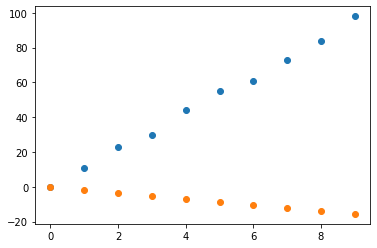

In [17]:
y_pred = model.predict(x)

plt.plot(x, y, linestyle='', marker='o')
plt.plot(x, y_pred, linestyle='', marker='o')
plt.show()

### **학습**

* 모델 컴파일

In [18]:
model.compile(loss='mse', optimizer=optimizers.SGD(learning_rate=0.01))

* 학습 진행

In [19]:
model.fit(x, y, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 493ms/step - loss: 4354.2114
Epoch 2/10
1/1 [==============================] - 0s 10ms/step - loss: 755.2501
Epoch 3/10
1/1 [==============================] - 0s 8ms/step - loss: 133.4767
Epoch 4/10
1/1 [==============================] - 0s 6ms/step - loss: 26.0501
Epoch 5/10
1/1 [==============================] - 0s 7ms/step - loss: 7.4836
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 4.2688
Epoch 7/10
1/1 [==============================] - 0s 5ms/step - loss: 3.7064
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 3.6022
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 3.5773
Epoch 10/10
1/1 [==============================] - 0s 3ms/step - loss: 3.5662


### **결과**

* 학습 파라미터 확인

In [20]:
print(model.get_weights())#random값
print("W:",model.get_weights()[0],"b:",model.get_weights()[1])

[array([[10.334791]], dtype=float32), array([1.8296257], dtype=float32)]
W: [[10.334791]] b: [1.8296257]


* 시각화

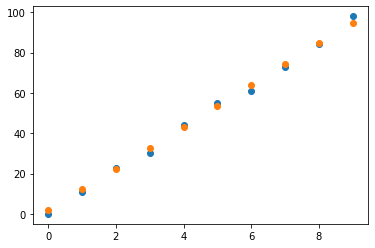

In [21]:
y_pred = model.predict(x)

plt.plot(x, y, linestyle='', marker='o')
plt.plot(x, y_pred, linestyle='', marker='o')
plt.show()

* 결과예측

In [22]:
x=[10,11]
model.predict(x)

array([[105.17754],
       [115.51233]], dtype=float32)

## 5. 실습2: 다중선형회귀 (Multiple Linear Regression Analysis)
---
<br>

###  <center>$f(\vec{x_i})=\vec{x}_iW+b$</center>

### **데이터**
|공부시간|집중도|수면시간|종합성적|
|------|---|---|---|
|0|1|9|0|
|1|1|8.5|11|
|2|2|8|23|
|3|4|8|30|
|4|3|7|44|
|5|5|7.5|55|
|6|6|7|61|
|7|6|6|73|
|8|7|7|84|
|9|6|6.5|98|



* 데이터 정의

In [23]:
x = np.array([[0, 1, 9],
              [1, 1, 8.5],
              [2, 2, 8],
              [3, 4, 8],
              [4, 3, 7],
              [5, 5, 7.5],
              [6, 6, 7],
              [7, 6, 6],
              [8, 7, 7],
              [9, 6, 6.5]])

y = np.array([0, 11, 23, 30, 44, 55, 61, 73, 84, 98])

### **모델 생성**

* 케라스를 이용한 모델 생성

In [24]:
model = Sequential()

model.add(Dense(1,input_dim=3, activation='linear'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


* 학습 파라미터 확인

In [25]:
print(model.get_weights())
print('w:', model.get_weights()[0], 'b:', model.get_weights()[1])

[array([[0.26517224],
       [0.1487943 ],
       [0.06645525]], dtype=float32), array([0.], dtype=float32)]
w: [[0.26517224]
 [0.1487943 ]
 [0.06645525]] b: [0.]


### **학습**

* 모델 컴파일

In [26]:
model.compile(loss='mse', optimizer=optimizers.SGD(learning_rate=0.01))

* 학습 진행

In [27]:
model.fit(x, y, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 233ms/step - loss: 2947.2329
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 2458.8718
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 2071.5928
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 1758.7119
Epoch 5/10
1/1 [==============================] - 0s 8ms/step - loss: 1501.9508
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 1288.5361
Epoch 7/10
1/1 [==============================] - 0s 8ms/step - loss: 1109.3386
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 957.6756
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 828.5322
Epoch 10/10
1/1 [==============================] - 0s 4ms/step - loss: 718.0555


### **결과**

* 학습 파라미터 확인

In [28]:
print(model.get_weights())
print('w:', model.get_weights()[0], 'b:', model.get_weights()[1])

[array([[ 5.480655 ],
       [ 3.2060623],
       [-1.8253297]], dtype=float32), array([-0.04514454], dtype=float32)]
w: [[ 5.480655 ]
 [ 3.2060623]
 [-1.8253297]] b: [-0.04514454]


* 결과 예측

In [29]:
x = [[6, 4, 8]]

print(model.predict(x))

[[31.060396]]
